## Step 1: Download and Preprocessing

In [316]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

In [317]:
train_dataset = dsets.MNIST(root='/home/nithin/Git/Datasets',
                     train=True,
                     transform=transforms.ToTensor(),
                     download=True)
test_dataset = dsets.MNIST(root='/home/nithin/Git/Datasets',
                     train=False,
                     transform=transforms.ToTensor(),
                     download=True)

In [318]:
len(train_dataset)

60000

In [319]:
len(test_dataset)

10000

In [320]:
train_dataset[0]

(tensor([[[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
            0.0000,  0.0000,  0.000

In [321]:
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [322]:
train_dataset[0][1]

tensor(5)

In [323]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

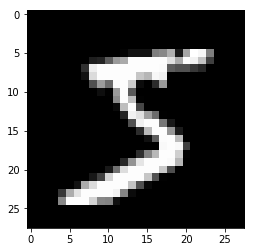

In [324]:
show_img = train_dataset[0][0].numpy().reshape(28,28)
plt.imshow(show_img, cmap="gray")

## Step 2: Make dataset iterable

- totalBata: 60000
- miniBatch: 100
- iterations: 3000
- epochs = iterations / (totalData/miniBatch) = 3000 / (60000/100) = 5

In [325]:
n_iters = 3000
total_data = len(train_dataset)
batch_size = 100
epochs = n_iters // (total_data // batch_size)

In [326]:
epochs

5

In [327]:
# Create iterable object
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=batch_size,
                                           shuffle=False)

## Step 3: Building a Model

In [328]:
class FullConnectedNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FullConnectedNN, self).__init__()
        
        
        self.fc1 = nn.Linear(input_dim, hidden_dim)
#         self.actfn1 = nn.Sigmoid()
#         self.actfn1 = nn.Tanh()
        self.actfn1 = nn.ReLU()
        
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.actfn2 = nn.ReLU()
        
        self.fc3 = nn.Linear(hidden_dim, output_dim)        
        
    
    def forward(self, x):
        # LINEAR
        out = self.fc1(x)
        # NON LINEAR ACTIVATION
        out = self.actfn1(out)
        
        
        # LINEAR
        out = self.fc2(out)
        # NON LINEAR ACTIVATION
        out = self.actfn2(out)
        
        
        # LINEAR OUTPUT LAYER
        out = self.fc3(out) # Since we are using cross entropy the softmax function is used implicitly.
        return out

In [329]:
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [330]:
input_dim = 28 * 28
hidden_dim = 100
output_dim = 10

model = FullConnectedNN(input_dim, hidden_dim, output_dim)
print(model)

FullConnectedNN(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (actfn1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (actfn2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


## Step 4: Instantiate Loss Class

In [331]:
criterion = nn.CrossEntropyLoss()

## Step 5: Instantiate Optimizer Class

In [332]:
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Parameters in depth

In [333]:
print(model.parameters())
print(len(list(model.parameters())))

# FC1
print(list(model.parameters())[0].size()) # Params
print(list(model.parameters())[1].size()) # Bias

# FC2
print(list(model.parameters())[2].size()) # Params
print(list(model.parameters())[3].size()) # Bias

# FC3
print(list(model.parameters())[4].size()) # Params
print(list(model.parameters())[5].size()) # Bias

<generator object Module.parameters at 0x7fb0c4b635c8>
6
torch.Size([100, 784])
torch.Size([100])
torch.Size([100, 100])
torch.Size([100])
torch.Size([10, 100])
torch.Size([10])


## Step 6: Train Model

1. Convert inputs/labels to variables
2. Clear gradient buffers
3. Get output from inputs
4. Get loss
5. Get gradients w.r.t parameters
6. Update parameters = parameters - learning_rate * parameter_gradients
7. REPEAT

In [334]:
iter = 0
for epoch in range(epochs):
    for images, labels in train_loader:
        images = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        optimizer.zero_grad()
        
        outputs = model(images)
        
        loss = criterion(outputs, labels)
        
        loss.backward()
        
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            correct = 0
            total = 0
            
            for i, (images, labels) in enumerate(test_loader):
                images = Variable(images.view(-1, 28 * 28))
                outputs = model(images)
                
                _, predicted = torch.max(outputs.data, 1) # Predicted gives the index of the highest possibility in 10 numbers, which is the number/label itself.
                
                if i == 0:
                    print('Output Size: {} Predicted Size: {}'.format(outputs.size(), predicted.size()))
                
                total += labels.size(0)
                
                correct += (predicted == labels).sum()
                
            accuracy = 100 * correct / total
            
            print('Iteration: {}. Loss: {}. Accuracy: {}%'.format(iter, loss.item(), accuracy))

Output Size: torch.Size([100, 10]) Predicted Size: torch.Size([100])
Iteration: 500. Loss: 0.3617895841598511. Accuracy: 91%
Output Size: torch.Size([100, 10]) Predicted Size: torch.Size([100])
Iteration: 1000. Loss: 0.17230267822742462. Accuracy: 93%
Output Size: torch.Size([100, 10]) Predicted Size: torch.Size([100])
Iteration: 1500. Loss: 0.11596976220607758. Accuracy: 94%
Output Size: torch.Size([100, 10]) Predicted Size: torch.Size([100])
Iteration: 2000. Loss: 0.1453312784433365. Accuracy: 95%
Output Size: torch.Size([100, 10]) Predicted Size: torch.Size([100])
Iteration: 2500. Loss: 0.10190591961145401. Accuracy: 95%
Output Size: torch.Size([100, 10]) Predicted Size: torch.Size([100])
Iteration: 3000. Loss: 0.08250372111797333. Accuracy: 96%


In [335]:
torch.save(model.state_dict(), 'FullyConnectedNN.pkl')

In [336]:
model.load_state_dict(torch.load('FullyConnectedNN.pkl'))